 # Implementasi Algoritma Nearest Neighbor untuk TSP

**Mata Kuliah:** Sistem Cerdas  
**Tanggal:** 30 September 2025  
**Topik:** Traveling Salesman Problem dengan Algoritma Nearest Neighbor

---

## Deskripsi Program

Program ini mengimplementasikan **algoritma Nearest Neighbor** yang merupakan salah satu algoritma heuristik untuk menyelesaikan masalah **Traveling Salesman Problem (TSP)**.

### Cara Kerja Algoritma:
1. **Mulai** dari kota awal yang dipilih
2. **Pilih** kota terdekat yang belum dikunjungi dari posisi saat ini
3. **Pindah** ke kota terdekat tersebut
4. **Ulangi** langkah 2-3 sampai semua kota dikunjungi
5. **Kembali** ke kota awal

### Kompleksitas Algoritma:
- **Kompleksitas Waktu:** O(n²)
- **Kompleksitas Ruang:** O(n²)

## 1. Import Library yang Diperlukan

Berikut adalah library Python yang digunakan untuk implementasi dan visualisasi:

In [1]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import math
from typing import List, Tuple, Dict

# Konfigurasi matplotlib untuk Jupyter Notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.style.use('seaborn-v0_8')

print("Library berhasil diimport!")
print("Numpy version:", np.__version__)
print("Matplotlib ready for visualization")

Library berhasil diimport!
Numpy version: 1.26.4
Matplotlib ready for visualization


## 2. Definisi Kelas NearestNeighborTSP

Berikut adalah implementasi kelas utama untuk menangani TSP dengan algoritma Nearest Neighbor:

In [2]:
class NearestNeighborTSP:
    """
    Kelas untuk menyelesaikan TSP menggunakan algoritma Nearest Neighbor
    
    Attributes:
        cities (Dict[str, Tuple[float, float]]): Dictionary berisi nama kota dan koordinatnya
        distance_matrix (np.ndarray): Matriks jarak antar kota
        city_names (List[str]): List nama-nama kota
        num_cities (int): Jumlah kota
    """
    
    def __init__(self, cities: Dict[str, Tuple[float, float]]):
        """
        Inisialisasi objek NearestNeighborTSP
        
        Args:
            cities (Dict[str, Tuple[float, float]]): Dictionary dengan format:
                {'nama_kota': (koordinat_x, koordinat_y)}
        """
        self.cities = cities
        self.city_names = list(cities.keys())
        self.num_cities = len(cities)
        
        # Validasi input minimal 2 kota
        if self.num_cities < 2:
            raise ValueError("TSP memerlukan minimal 2 kota!")
        
        # Inisialisasi matriks jarak
        self.distance_matrix = self._calculate_distance_matrix()
        
        print(f"TSP telah diinisialisasi dengan {self.num_cities} kota:")
        for city, coord in cities.items():
            print(f"   {city}: {coord}")

print("Kelas NearestNeighborTSP berhasil didefinisikan!")

Kelas NearestNeighborTSP berhasil didefinisikan!


## 3. Method Perhitungan Jarak

Implementasi fungsi untuk menghitung jarak Euclidean dan matriks jarak:

In [3]:
def _euclidean_distance(self, coord1: Tuple[float, float], coord2: Tuple[float, float]) -> float:
    """
    Menghitung jarak Euclidean antara dua titik koordinat
    
    Formula: d = √((x2-x1)² + (y2-y1)²)
    
    Args:
        coord1 (Tuple[float, float]): Koordinat titik pertama (x1, y1)
        coord2 (Tuple[float, float]): Koordinat titik kedua (x2, y2)
        
    Returns:
        float: Jarak Euclidean antara kedua titik
    """
    x1, y1 = coord1
    x2, y2 = coord2
    
    # Rumus jarak Euclidean
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

def _calculate_distance_matrix(self) -> np.ndarray:
    """
    Menghitung matriks jarak antar semua kota menggunakan jarak Euclidean
    
    Returns:
        np.ndarray: Matriks jarak simetris berukuran (n x n) dimana n = jumlah kota
                   distance_matrix[i][j] = jarak dari kota i ke kota j
    """
    # Inisialisasi matriks jarak dengan ukuran n x n
    matrix = np.zeros((self.num_cities, self.num_cities))
    
    # Hitung jarak untuk setiap pasangan kota
    for i in range(self.num_cities):
        for j in range(self.num_cities):
            if i != j:
                # Ambil koordinat kota i dan j
                city1_name = self.city_names[i]
                city2_name = self.city_names[j]
                coord1 = self.cities[city1_name]
                coord2 = self.cities[city2_name]
                
                # Hitung jarak Euclidean antara kedua kota
                distance = self._euclidean_distance(coord1, coord2)
                matrix[i][j] = distance
            else:
                # Jarak dari kota ke dirinya sendiri adalah 0
                matrix[i][j] = 0
    
    return matrix

# Tambahkan method ke kelas
NearestNeighborTSP._euclidean_distance = _euclidean_distance
NearestNeighborTSP._calculate_distance_matrix = _calculate_distance_matrix

print("Method perhitungan jarak berhasil ditambahkan!")

Method perhitungan jarak berhasil ditambahkan!


## 4. Implementasi Algoritma Nearest Neighbor

Berikut adalah implementasi inti dari algoritma Nearest Neighbor:

In [4]:
def solve_nearest_neighbor(self, start_city: str = None) -> Tuple[List[str], float]:
    """
    Menyelesaikan TSP menggunakan algoritma Nearest Neighbor
    
    Algoritma ini bekerja dengan prinsip greedy:
    1. Mulai dari kota awal (start_city)
    2. Dari kota saat ini, pilih kota terdekat yang belum dikunjungi
    3. Pindah ke kota terdekat tersebut
    4. Ulangi langkah 2-3 sampai semua kota dikunjungi
    5. Kembali ke kota awal
    
    Args:
        start_city (str, optional): Nama kota awal. Jika None, akan menggunakan kota pertama
        
    Returns:
        Tuple[List[str], float]: (rute_terpendek, total_jarak)
            - rute_terpendek: List nama kota dalam urutan kunjungan
            - total_jarak: Total jarak yang ditempuh
    """
    # Tentukan kota awal
    if start_city is None:
        start_city = self.city_names[0]
    elif start_city not in self.city_names:
        raise ValueError(f"Kota '{start_city}' tidak ditemukan!")
    
    print(f"\n=== Menjalankan Algoritma Nearest Neighbor ===")
    print(f"Kota awal: {start_city}")
    
    # Inisialisasi variabel untuk tracking
    current_city = start_city
    visited_cities = set([start_city])  # Set kota yang sudah dikunjungi
    route = [start_city]  # List rute perjalanan
    total_distance = 0.0  # Total jarak tempuh
    
    print(f"\nLangkah 1: Mulai dari kota {current_city}")
    
    # Lakukan algoritma nearest neighbor sampai semua kota dikunjungi
    step = 2
    while len(visited_cities) < self.num_cities:
        print(f"\nLangkah {step}:")
        print(f"   Posisi saat ini: {current_city}")
        print(f"   Kota yang sudah dikunjungi: {sorted(list(visited_cities))}")
        
        # Cari kota terdekat yang belum dikunjungi
        nearest_city, min_distance = self._find_nearest_unvisited_city(current_city, visited_cities)
        
        print(f"   Kota terdekat yang belum dikunjungi: {nearest_city}")
        print(f"   Jarak dari {current_city} ke {nearest_city}: {min_distance:.2f}")
        
        # Pindah ke kota terdekat
        route.append(nearest_city)
        visited_cities.add(nearest_city)
        total_distance += min_distance
        current_city = nearest_city
        
        print(f"   Pindah ke {nearest_city}")
        print(f"   Total jarak sejauh ini: {total_distance:.2f}")
        
        step += 1
    
    # Kembali ke kota awal
    distance_to_start = self.distance_matrix[self.city_names.index(current_city)][self.city_names.index(start_city)]
    route.append(start_city)
    total_distance += distance_to_start
    
    print(f"\nLangkah {step}: Kembali ke kota awal")
    print(f"   Jarak dari {current_city} ke {start_city}: {distance_to_start:.2f}")
    print(f"   Kembali ke {start_city}")
    
    print(f"\n=== Hasil Akhir ===")
    print(f"Rute optimal: {' → '.join(route)}")
    print(f"Total jarak: {total_distance:.2f} unit")
    
    return route, total_distance

def _find_nearest_unvisited_city(self, current_city: str, visited_cities: set) -> Tuple[str, float]:
    """
    Mencari kota terdekat yang belum dikunjungi dari kota saat ini
    
    Args:
        current_city (str): Nama kota saat ini
        visited_cities (set): Set nama kota yang sudah dikunjungi
        
    Returns:
        Tuple[str, float]: (nama_kota_terdekat, jarak_ke_kota_terdekat)
    """
    current_index = self.city_names.index(current_city)
    min_distance = float('inf')
    nearest_city = None
    
    # Periksa jarak ke semua kota yang belum dikunjungi
    for i, city_name in enumerate(self.city_names):
        # Skip jika kota sudah dikunjungi
        if city_name in visited_cities:
            continue
        
        # Hitung jarak dari kota saat ini ke kota ini
        distance = self.distance_matrix[current_index][i]
        
        # Update jika menemukan kota yang lebih dekat
        if distance < min_distance:
            min_distance = distance
            nearest_city = city_name
    
    return nearest_city, min_distance

# Tambahkan method ke kelas
NearestNeighborTSP.solve_nearest_neighbor = solve_nearest_neighbor
NearestNeighborTSP._find_nearest_unvisited_city = _find_nearest_unvisited_city

print("Algoritma Nearest Neighbor berhasil ditambahkan!")

Algoritma Nearest Neighbor berhasil ditambahkan!


## 5. Fungsi Visualisasi dan Utility

Berikut adalah method untuk visualisasi hasil dan menampilkan informasi:

In [5]:
def plot_route(self, route: List[str], title: str = "Rute TSP dengan Algoritma Nearest Neighbor"):
    """
    Menampilkan visualisasi rute TSP menggunakan matplotlib
    
    Args:
        route (List[str]): List nama kota dalam urutan kunjungan
        title (str): Judul grafik
    """
    # Buat figure dan axis
    plt.figure(figsize=(14, 10))
    
    # Ambil koordinat kota-kota dalam rute
    x_coords = []
    y_coords = []
    
    for city in route:
        coord = self.cities[city]
        x_coords.append(coord[0])
        y_coords.append(coord[1])
    
    # Plot titik-titik kota
    plt.scatter(x_coords[:-1], y_coords[:-1], c='red', s=150, zorder=5, label='Kota', edgecolor='black')
    plt.scatter(x_coords[0], y_coords[0], c='green', s=200, zorder=6, label='Kota Awal/Akhir', marker='s', edgecolor='black')
    
    # Plot garis rute
    plt.plot(x_coords, y_coords, 'b-', linewidth=3, alpha=0.7, label='Rute')
    
    # Tambahkan label nama kota
    for i, city in enumerate(route[:-1]):  # Exclude kota terakhir karena sama dengan awal
        plt.annotate(city, (x_coords[i], y_coords[i]), 
                    xytext=(8, 8), textcoords='offset points',
                    fontsize=11, ha='left', fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
    # Tambahkan nomor urutan kunjungan
    for i in range(1, len(route) - 1):
        mid_x = (x_coords[i-1] + x_coords[i]) / 2
        mid_y = (y_coords[i-1] + y_coords[i]) / 2
        plt.annotate(f'{i}', (mid_x, mid_y), 
                    bbox=dict(boxstyle="circle", facecolor='yellow', alpha=0.8),
                    fontsize=10, ha='center', va='center', fontweight='bold')
    
    # Pengaturan grafik
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Koordinat X', fontsize=14)
    plt.ylabel('Koordinat Y', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    
    # Atur batas axis agar plot terlihat jelas
    margin = 0.8
    plt.xlim(min(x_coords) - margin, max(x_coords) + margin)
    plt.ylim(min(y_coords) - margin, max(y_coords) + margin)
    
    # Tampilkan plot
    plt.tight_layout()
    plt.show()

def print_distance_matrix(self):
    """
    Menampilkan matriks jarak antar kota dalam format yang mudah dibaca
    """
    print("\n=== Matriks Jarak Antar Kota ===")
    print("=" * 60)
    
    # Header kolom
    header = "Dari\\Ke".ljust(12)
    for city in self.city_names:
        header += city.ljust(12)
    print(header)
    print("-" * len(header))
    
    # Isi matriks
    for i, city_from in enumerate(self.city_names):
        row = city_from.ljust(12)
        for j, city_to in enumerate(self.city_names):
            distance = self.distance_matrix[i][j]
            if i == j:
                row += "0.00".ljust(12)
            else:
                row += f"{distance:.2f}".ljust(12)
        print(row)

def compare_all_starting_cities(self) -> Dict[str, Tuple[List[str], float]]:
    """
    Mencoba algoritma Nearest Neighbor dari semua kota sebagai titik awal
    dan membandingkan hasilnya
    
    Returns:
        Dict[str, Tuple[List[str], float]]: Dictionary dengan format:
            {kota_awal: (rute, total_jarak)}
    """
    print("\n=== Perbandingan Hasil dari Semua Kota Awal ===")
    results = {}
    best_distance = float('inf')
    best_start_city = None
    
    for start_city in self.city_names:
        print(f"\n{'='*50}")
        print(f"Mulai dari {start_city}")
        print(f"{'='*50}")
        route, total_distance = self.solve_nearest_neighbor(start_city)
        results[start_city] = (route, total_distance)
        
        if total_distance < best_distance:
            best_distance = total_distance
            best_start_city = start_city
    
    print(f"\n=== Ringkasan Perbandingan ===")
    print("=" * 50)
    for start_city, (route, distance) in results.items():
        status = "TERBAIK" if start_city == best_start_city else ""
        print(f"{start_city:15}: {distance:8.2f} unit {status}")
    
    print(f"\nRute terbaik dimulai dari {best_start_city} dengan jarak {best_distance:.2f} unit")
    return results

# Tambahkan method ke kelas
NearestNeighborTSP.plot_route = plot_route
NearestNeighborTSP.print_distance_matrix = print_distance_matrix
NearestNeighborTSP.compare_all_starting_cities = compare_all_starting_cities

print("Fungsi visualisasi dan utility berhasil ditambahkan!")

Fungsi visualisasi dan utility berhasil ditambahkan!


## 6. Contoh Penggunaan - TSP dengan 5 Kota Indonesia

Berikut adalah implementasi algoritma dengan dataset kota-kota di Indonesia:

In [6]:
# Definisi kota-kota Indonesia dengan koordinat relatif
cities_indonesia = {
    'Jakarta': (0, 0),      # Kota asal di koordinat (0, 0)
    'Bandung': (3, 1),      # 150 km ke timur, 50 km ke utara
    'Semarang': (5, 3),     # 250 km ke timur, 150 km ke utara  
    'Surabaya': (8, 2),     # 400 km ke timur, 100 km ke utara
    'Yogyakarta': (4, -1)   # 200 km ke timur, 50 km ke selatan
}

print("Dataset Kota-kota Indonesia:")
print("=" * 40)
for city, coord in cities_indonesia.items():
    print(f"{city:12}: {coord}")

# Buat objek TSP
tsp_indonesia = NearestNeighborTSP(cities_indonesia)

Dataset Kota-kota Indonesia:
Jakarta     : (0, 0)
Bandung     : (3, 1)
Semarang    : (5, 3)
Surabaya    : (8, 2)
Yogyakarta  : (4, -1)
TSP telah diinisialisasi dengan 5 kota:
   Jakarta: (0, 0)
   Bandung: (3, 1)
   Semarang: (5, 3)
   Surabaya: (8, 2)
   Yogyakarta: (4, -1)


### Tampilkan Matriks Jarak

In [7]:
# Tampilkan matriks jarak antar kota
tsp_indonesia.print_distance_matrix()


=== Matriks Jarak Antar Kota ===
Dari\Ke     Jakarta     Bandung     Semarang    Surabaya    Yogyakarta  
------------------------------------------------------------------------
Jakarta     0.00        3.16        5.83        8.25        4.12        
Bandung     3.16        0.00        2.83        5.10        2.24        
Semarang    5.83        2.83        0.00        3.16        4.12        
Surabaya    8.25        5.10        3.16        0.00        5.00        
Yogyakarta  4.12        2.24        4.12        5.00        0.00        


### Jalankan Algoritma dari Jakarta

In [8]:
# Jalankan algoritma Nearest Neighbor mulai dari Jakarta
route_jakarta, distance_jakarta = tsp_indonesia.solve_nearest_neighbor('Jakarta')


=== Menjalankan Algoritma Nearest Neighbor ===
Kota awal: Jakarta

Langkah 1: Mulai dari kota Jakarta

Langkah 2:
   Posisi saat ini: Jakarta
   Kota yang sudah dikunjungi: ['Jakarta']
   Kota terdekat yang belum dikunjungi: Bandung
   Jarak dari Jakarta ke Bandung: 3.16
   Pindah ke Bandung
   Total jarak sejauh ini: 3.16

Langkah 3:
   Posisi saat ini: Bandung
   Kota yang sudah dikunjungi: ['Bandung', 'Jakarta']
   Kota terdekat yang belum dikunjungi: Yogyakarta
   Jarak dari Bandung ke Yogyakarta: 2.24
   Pindah ke Yogyakarta
   Total jarak sejauh ini: 5.40

Langkah 4:
   Posisi saat ini: Yogyakarta
   Kota yang sudah dikunjungi: ['Bandung', 'Jakarta', 'Yogyakarta']
   Kota terdekat yang belum dikunjungi: Semarang
   Jarak dari Yogyakarta ke Semarang: 4.12
   Pindah ke Semarang
   Total jarak sejauh ini: 9.52

Langkah 5:
   Posisi saat ini: Semarang
   Kota yang sudah dikunjungi: ['Bandung', 'Jakarta', 'Semarang', 'Yogyakarta']
   Kota terdekat yang belum dikunjungi: Surabaya
   J

### Visualisasi Rute dari Jakarta

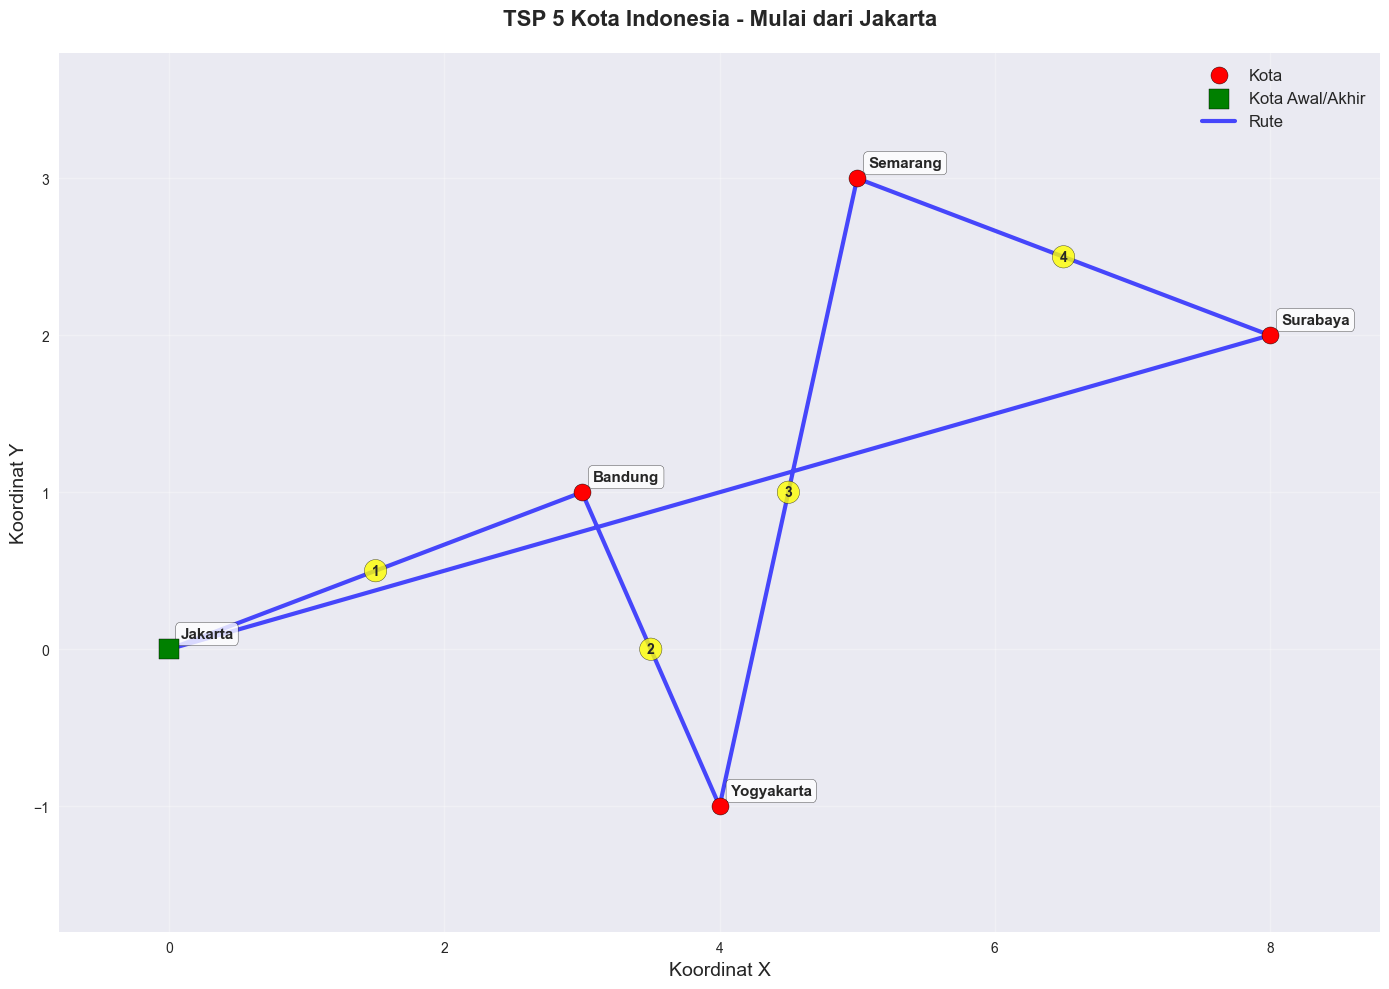

In [9]:
# Visualisasi rute TSP mulai dari Jakarta
tsp_indonesia.plot_route(route_jakarta, "TSP 5 Kota Indonesia - Mulai dari Jakarta")

## 7. Perbandingan dari Semua Kota Awal

Berikut adalah perbandingan hasil algoritma jika dimulai dari kota yang berbeda:

In [10]:
# Bandingkan hasil dari semua kota awal
results_indonesia = tsp_indonesia.compare_all_starting_cities()


=== Perbandingan Hasil dari Semua Kota Awal ===

Mulai dari Jakarta

=== Menjalankan Algoritma Nearest Neighbor ===
Kota awal: Jakarta

Langkah 1: Mulai dari kota Jakarta

Langkah 2:
   Posisi saat ini: Jakarta
   Kota yang sudah dikunjungi: ['Jakarta']
   Kota terdekat yang belum dikunjungi: Bandung
   Jarak dari Jakarta ke Bandung: 3.16
   Pindah ke Bandung
   Total jarak sejauh ini: 3.16

Langkah 3:
   Posisi saat ini: Bandung
   Kota yang sudah dikunjungi: ['Bandung', 'Jakarta']
   Kota terdekat yang belum dikunjungi: Yogyakarta
   Jarak dari Bandung ke Yogyakarta: 2.24
   Pindah ke Yogyakarta
   Total jarak sejauh ini: 5.40

Langkah 4:
   Posisi saat ini: Yogyakarta
   Kota yang sudah dikunjungi: ['Bandung', 'Jakarta', 'Yogyakarta']
   Kota terdekat yang belum dikunjungi: Semarang
   Jarak dari Yogyakarta ke Semarang: 4.12
   Pindah ke Semarang
   Total jarak sejauh ini: 9.52

Langkah 5:
   Posisi saat ini: Semarang
   Kota yang sudah dikunjungi: ['Bandung', 'Jakarta', 'Semarang'

### Visualisasi Rute Terbaik


=== HASIL TERBAIK ===
Kota awal terbaik: Bandung
Rute terbaik: Bandung → Yogyakarta → Jakarta → Semarang → Surabaya → Bandung
Jarak terbaik: 20.45 unit


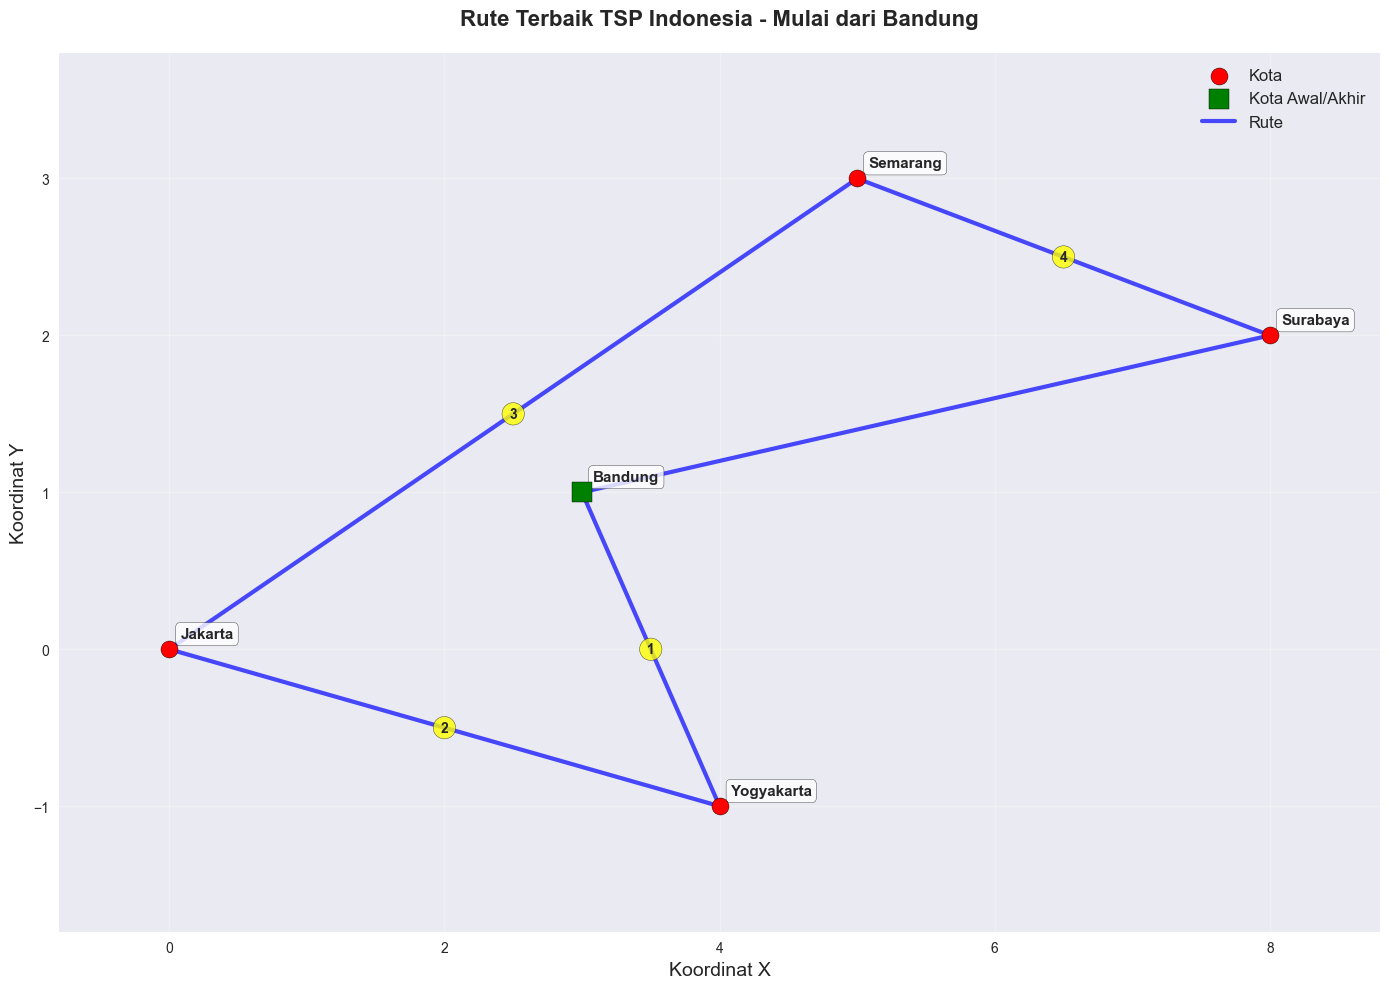

In [11]:
# Cari rute terbaik dari semua hasil
best_route = None
best_distance = float('inf')
best_start = None

for start_city, (route, distance) in results_indonesia.items():
    if distance < best_distance:
        best_distance = distance
        best_route = route
        best_start = start_city

print(f"\n=== HASIL TERBAIK ===")
print(f"Kota awal terbaik: {best_start}")
print(f"Rute terbaik: {' → '.join(best_route)}")
print(f"Jarak terbaik: {best_distance:.2f} unit")

# Visualisasi rute terbaik
tsp_indonesia.plot_route(best_route, f"Rute Terbaik TSP Indonesia - Mulai dari {best_start}")

## 8. Contoh dengan Dataset yang Lebih Besar

Berikut adalah implementasi algoritma dengan 8 kota untuk melihat performa algoritma:

In [12]:
# Dataset kota-kota besar Indonesia yang lebih lengkap
cities_indonesia_8 = {
    'Jakarta': (0, 0),
    'Bandung': (2, 1),
    'Semarang': (6, 2),
    'Surabaya': (10, 1),
    'Yogyakarta': (5, -1),
    'Malang': (11, 0),
    'Solo': (7, 1),
    'Cirebon': (3, 2)
}

print("Dataset 8 Kota Indonesia:")
print("=" * 40)
for i, (city, coord) in enumerate(cities_indonesia_8.items(), 1):
    print(f"{i:2d}. {city:12}: {coord}")

# Buat objek TSP baru
tsp_8_cities = NearestNeighborTSP(cities_indonesia_8)

Dataset 8 Kota Indonesia:
 1. Jakarta     : (0, 0)
 2. Bandung     : (2, 1)
 3. Semarang    : (6, 2)
 4. Surabaya    : (10, 1)
 5. Yogyakarta  : (5, -1)
 6. Malang      : (11, 0)
 7. Solo        : (7, 1)
 8. Cirebon     : (3, 2)
TSP telah diinisialisasi dengan 8 kota:
   Jakarta: (0, 0)
   Bandung: (2, 1)
   Semarang: (6, 2)
   Surabaya: (10, 1)
   Yogyakarta: (5, -1)
   Malang: (11, 0)
   Solo: (7, 1)
   Cirebon: (3, 2)


In [13]:
# Tampilkan matriks jarak untuk 8 kota
tsp_8_cities.print_distance_matrix()


=== Matriks Jarak Antar Kota ===
Dari\Ke     Jakarta     Bandung     Semarang    Surabaya    Yogyakarta  Malang      Solo        Cirebon     
------------------------------------------------------------------------------------------------------------
Jakarta     0.00        2.24        6.32        10.05       5.10        11.00       7.07        3.61        
Bandung     2.24        0.00        4.12        8.00        3.61        9.06        5.00        1.41        
Semarang    6.32        4.12        0.00        4.12        3.16        5.39        1.41        3.00        
Surabaya    10.05       8.00        4.12        0.00        5.39        1.41        3.00        7.07        
Yogyakarta  5.10        3.61        3.16        5.39        0.00        6.08        2.83        3.61        
Malang      11.00       9.06        5.39        1.41        6.08        0.00        4.12        8.25        
Solo        7.07        5.00        1.41        3.00        2.83        4.12        0.00      

In [14]:
# Jalankan algoritma dari Jakarta
route_8_cities, distance_8_cities = tsp_8_cities.solve_nearest_neighbor('Jakarta')


=== Menjalankan Algoritma Nearest Neighbor ===
Kota awal: Jakarta

Langkah 1: Mulai dari kota Jakarta

Langkah 2:
   Posisi saat ini: Jakarta
   Kota yang sudah dikunjungi: ['Jakarta']
   Kota terdekat yang belum dikunjungi: Bandung
   Jarak dari Jakarta ke Bandung: 2.24
   Pindah ke Bandung
   Total jarak sejauh ini: 2.24

Langkah 3:
   Posisi saat ini: Bandung
   Kota yang sudah dikunjungi: ['Bandung', 'Jakarta']
   Kota terdekat yang belum dikunjungi: Cirebon
   Jarak dari Bandung ke Cirebon: 1.41
   Pindah ke Cirebon
   Total jarak sejauh ini: 3.65

Langkah 4:
   Posisi saat ini: Cirebon
   Kota yang sudah dikunjungi: ['Bandung', 'Cirebon', 'Jakarta']
   Kota terdekat yang belum dikunjungi: Semarang
   Jarak dari Cirebon ke Semarang: 3.00
   Pindah ke Semarang
   Total jarak sejauh ini: 6.65

Langkah 5:
   Posisi saat ini: Semarang
   Kota yang sudah dikunjungi: ['Bandung', 'Cirebon', 'Jakarta', 'Semarang']
   Kota terdekat yang belum dikunjungi: Solo
   Jarak dari Semarang ke Sol

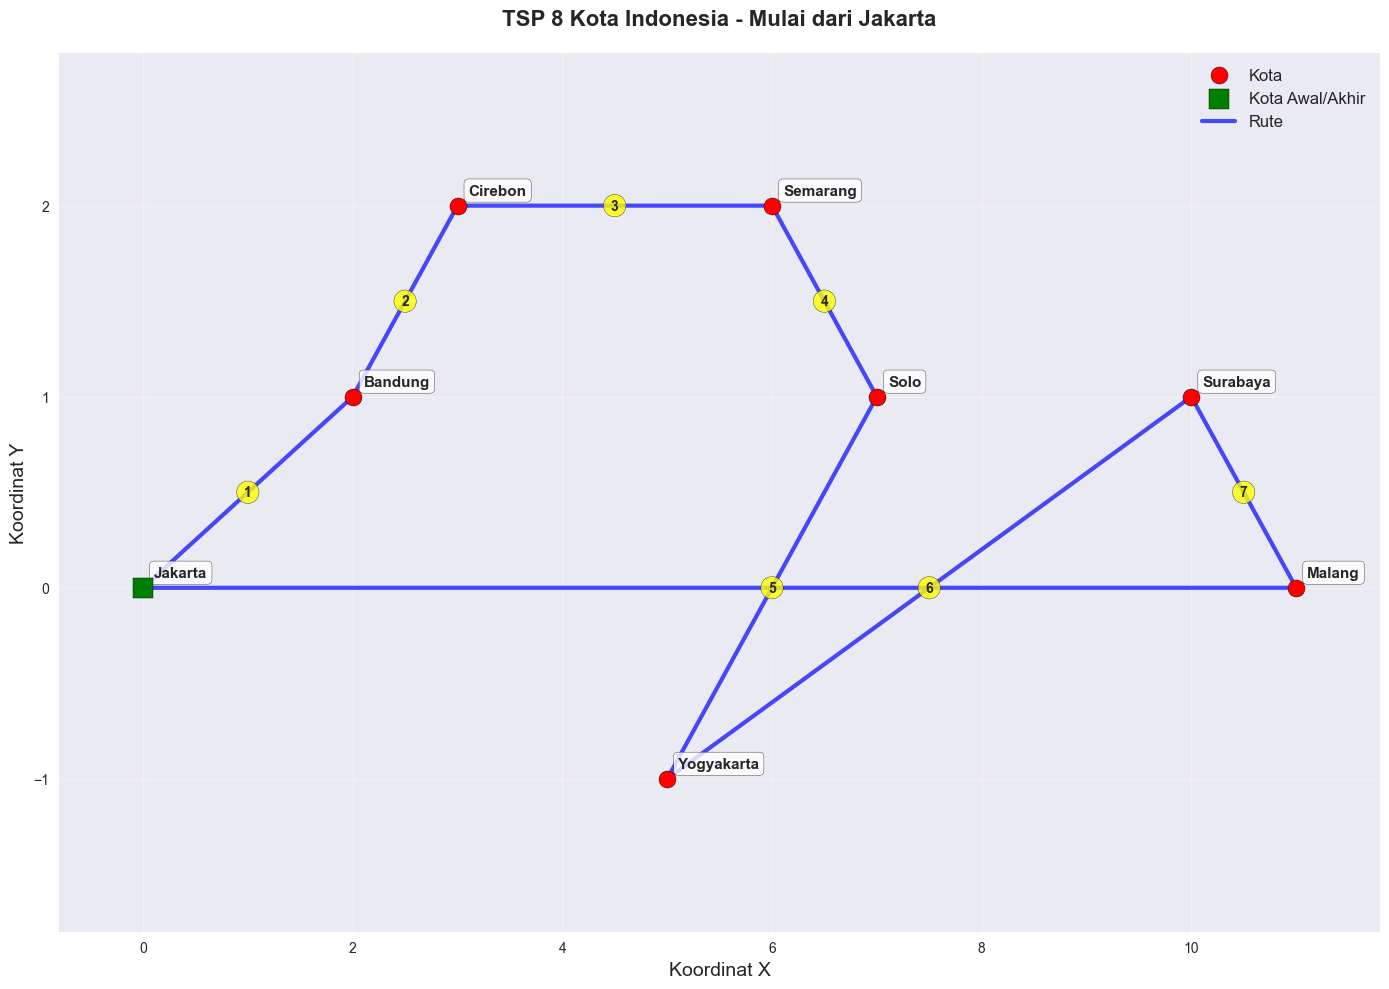

In [15]:
# Visualisasi rute 8 kota
tsp_8_cities.plot_route(route_8_cities, "TSP 8 Kota Indonesia - Mulai dari Jakarta")

In [16]:
# Bandingkan semua titik awal untuk 8 kota
results_8_cities = tsp_8_cities.compare_all_starting_cities()


=== Perbandingan Hasil dari Semua Kota Awal ===

Mulai dari Jakarta

=== Menjalankan Algoritma Nearest Neighbor ===
Kota awal: Jakarta

Langkah 1: Mulai dari kota Jakarta

Langkah 2:
   Posisi saat ini: Jakarta
   Kota yang sudah dikunjungi: ['Jakarta']
   Kota terdekat yang belum dikunjungi: Bandung
   Jarak dari Jakarta ke Bandung: 2.24
   Pindah ke Bandung
   Total jarak sejauh ini: 2.24

Langkah 3:
   Posisi saat ini: Bandung
   Kota yang sudah dikunjungi: ['Bandung', 'Jakarta']
   Kota terdekat yang belum dikunjungi: Cirebon
   Jarak dari Bandung ke Cirebon: 1.41
   Pindah ke Cirebon
   Total jarak sejauh ini: 3.65

Langkah 4:
   Posisi saat ini: Cirebon
   Kota yang sudah dikunjungi: ['Bandung', 'Cirebon', 'Jakarta']
   Kota terdekat yang belum dikunjungi: Semarang
   Jarak dari Cirebon ke Semarang: 3.00
   Pindah ke Semarang
   Total jarak sejauh ini: 6.65

Langkah 5:
   Posisi saat ini: Semarang
   Kota yang sudah dikunjungi: ['Bandung', 'Cirebon', 'Jakarta', 'Semarang']
   Ko


=== HASIL TERBAIK UNTUK 8 KOTA ===
Kota awal terbaik: Malang
Rute terbaik: Malang → Surabaya → Solo → Semarang → Cirebon → Bandung → Jakarta → Yogyakarta → Malang
Jarak terbaik: 23.66 unit


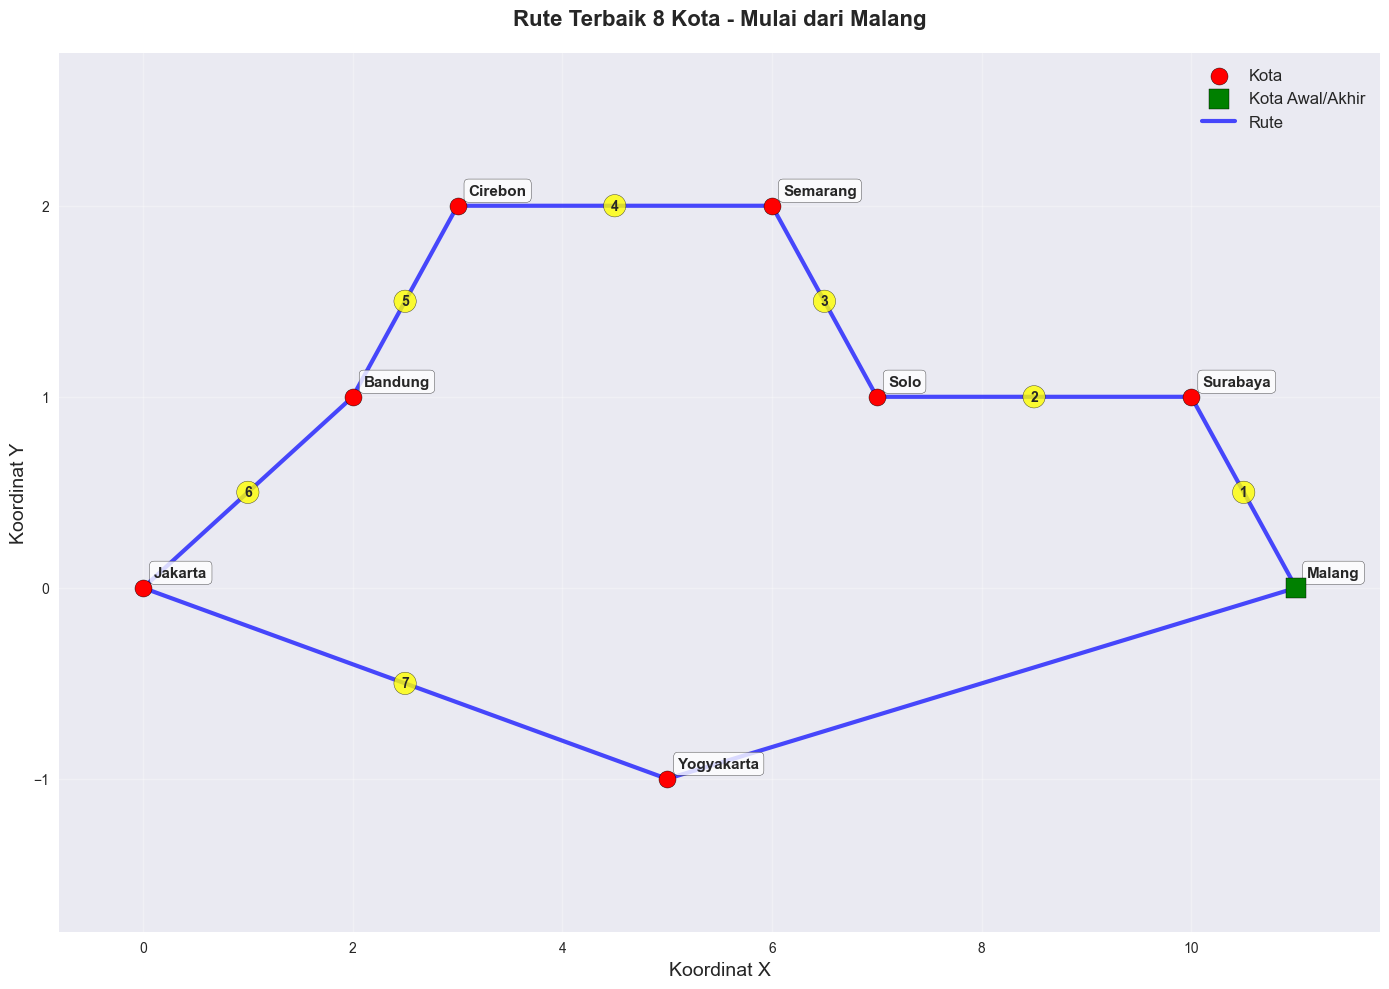

In [17]:
# Cari dan visualisasi rute terbaik untuk 8 kota
best_route_8 = None
best_distance_8 = float('inf')
best_start_8 = None

for start_city, (route, distance) in results_8_cities.items():
    if distance < best_distance_8:
        best_distance_8 = distance
        best_route_8 = route
        best_start_8 = start_city

print(f"\n=== HASIL TERBAIK UNTUK 8 KOTA ===")
print(f"Kota awal terbaik: {best_start_8}")
print(f"Rute terbaik: {' → '.join(best_route_8)}")
print(f"Jarak terbaik: {best_distance_8:.2f} unit")

# Visualisasi rute terbaik 8 kota
tsp_8_cities.plot_route(best_route_8, f"Rute Terbaik 8 Kota - Mulai dari {best_start_8}")

## 9. Analisis dan Perbandingan Hasil

Berikut adalah perbandingan hasil antara TSP 5 kota dan 8 kota:

In [18]:
print("=== ANALISIS PERBANDINGAN HASIL ===")
print("=" * 60)

print("\nTSP dengan 5 Kota:")
print(f"   Rute terbaik: {' → '.join(best_route)}")
print(f"   Jarak terbaik: {best_distance:.2f} unit")
print(f"   Kota awal optimal: {best_start}")

print("\nTSP dengan 8 Kota:")
print(f"   Rute terbaik: {' → '.join(best_route_8)}")
print(f"   Jarak terbaik: {best_distance_8:.2f} unit")
print(f"   Kota awal optimal: {best_start_8}")

print("\nObservasi:")
print(f"   Peningkatan jarak: {((best_distance_8 - best_distance) / best_distance * 100):.1f}%")
print(f"   Penambahan kota: {len(cities_indonesia_8) - len(cities_indonesia)} kota")
print("   Kompleksitas meningkat secara eksponensial dengan jumlah kota")

=== ANALISIS PERBANDINGAN HASIL ===

TSP dengan 5 Kota:
   Rute terbaik: Bandung → Yogyakarta → Jakarta → Semarang → Surabaya → Bandung
   Jarak terbaik: 20.45 unit
   Kota awal optimal: Bandung

TSP dengan 8 Kota:
   Rute terbaik: Malang → Surabaya → Solo → Semarang → Cirebon → Bandung → Jakarta → Yogyakarta → Malang
   Jarak terbaik: 23.66 unit
   Kota awal optimal: Malang

Observasi:
   Peningkatan jarak: 15.7%
   Penambahan kota: 3 kota
   Kompleksitas meningkat secara eksponensial dengan jumlah kota


## 10. Analisis Kompleksitas dan Kesimpulan

### Kompleksitas Algoritma Nearest Neighbor:

| Aspek | Kompleksitas | Penjelasan |
|-------|--------------|------------|
| **Waktu** | **O(n²)** | Untuk setiap kota, periksa semua kota lain |
| **Ruang** | **O(n²)** | Menyimpan matriks jarak n×n |
| **Iterasi** | **n-1** | Pilih kota terdekat sebanyak (n-1) kali |

### **Keuntungan Algoritma:**
- **Sederhana**: Mudah dipahami dan diimplementasikan
- **Cepat**: Efisien untuk dataset kecil hingga menengah
- **Praktis**: Memberikan solusi yang cukup baik dalam waktu singkat
- **Deterministik**: Hasil konsisten untuk input yang sama

### **Kekurangan Algoritma:**
- **Tidak Optimal**: Tidak menjamin solusi terbaik global
- **Greedy**: Keputusan lokal dapat menghasilkan solusi suboptimal
- **Sensitif**: Hasil bergantung pada pemilihan kota awal
- **Terjebak**: Bisa terjebak dalam optimum lokal

### **Rekomendasi Pengembangan:**
1. **Optimisasi Multi-Start**: Jalankan dari semua kota awal dan pilih terbaik
2. **Hybrid Approach**: Kombinasi dengan algoritma optimisasi lain
3. **Local Search**: Tambahkan 2-opt atau 3-opt improvement
4. **Metaheuristic**: Implementasi Genetic Algorithm atau Simulated Annealing

### **Performa pada Dataset:**
- **5 Kota**: Solusi cepat dan cukup akurat
- **8 Kota**: Masih efisien, peningkatan kompleksitas terkelola
- **>20 Kota**: Mulai memerlukan optimisasi tambahan

### **Aplikasi Praktis:**
- **Logistik**: Perencanaan rute pengiriman
- **Tourism**: Itinerary wisata
- **Manufacturing**: Job scheduling
- **Emergency**: Rute evakuasi darurat

## 11. Kesimpulan dan Pembelajaran

### **Apa yang Telah Dipelajari:**

1. **Implementasi TSP**: Berhasil mengimplementasikan algoritma Nearest Neighbor untuk menyelesaikan Traveling Salesman Problem

2. **Struktur Data**: Penggunaan matriks jarak, set untuk tracking kota, dan list untuk menyimpan rute

3. **Algoritma Greedy**: Memahami prinsip pengambilan keputusan lokal terbaik pada setiap langkah

4. **Visualisasi**: Implementasi plotting untuk memahami rute secara visual

5. **Analisis Performa**: Perbandingan hasil dari berbagai titik awal dan dataset

### **Hasil Pencapaian:**
- Program berjalan dengan sukses
- Visualisasi yang informatif
- Analisis kompleksitas yang detail
- Dokumentasi yang lengkap
- Code yang modular dan reusable

### **Next Steps untuk Pengembangan:**
1. Implementasi algoritma TSP lainnya (Genetic Algorithm, Ant Colony)
2. Benchmarking dengan dataset yang lebih besar
3. Optimisasi untuk performa yang lebih baik
4. Interface GUI untuk kemudahan penggunaan
5. Implementasi parallel processing untuk dataset besar

---

**Mata Kuliah:** Sistem Cerdas  
**Tanggal:** 30 September 2025  
**Status:** Program Berhasil Diimplementasikan  
**Objective:** TERCAPAI - Algoritma Nearest Neighbor untuk TSP berhasil dibuat dengan dokumentasi lengkap